In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq, whiten

In [2]:
iris = pd.read_csv('data/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 6)

In [4]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

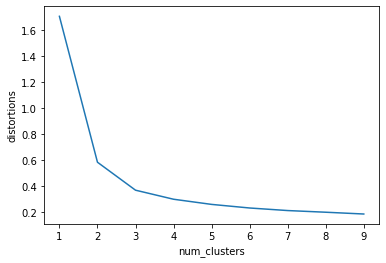

In [5]:
distortions = []
num_clusters = range(1, 10)

for i in num_clusters:
    cluster_centers, distortion = kmeans(iris[['PetalLengthCm', 'PetalWidthCm']], i)
    distortions.append(distortion)
    
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [6]:
cluster_centers, distortion = kmeans(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']], 2)

iris['cluster_labels'], distortion_list = vq(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']], cluster_centers)

In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [8]:
iris.groupby('cluster_labels')[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']].mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
cluster_labels,,,,
0,5.005660,3.360377,1.562264,0.288679
1,6.301031,2.886598,4.958763,1.695876


In [9]:
iris.groupby('cluster_labels')['Id'].count()

cluster_labels
0    53
1    97
Name: Id, dtype: int64

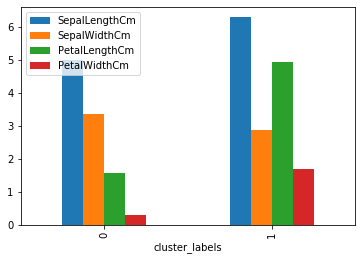

In [10]:
iris.groupby('cluster_labels')[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']].mean().plot(kind='bar')
plt.show()

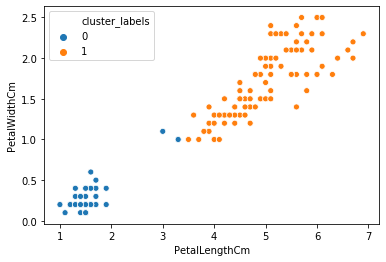

In [11]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='cluster_labels', data=iris)
plt.show()

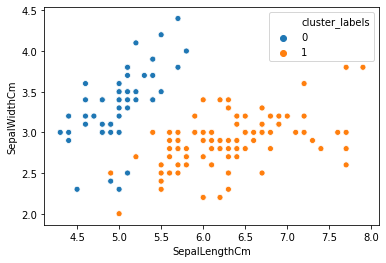

In [12]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='cluster_labels', data=iris)
plt.show()

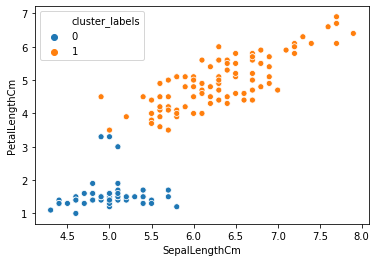

In [13]:
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', hue='cluster_labels', data=iris)
plt.show()

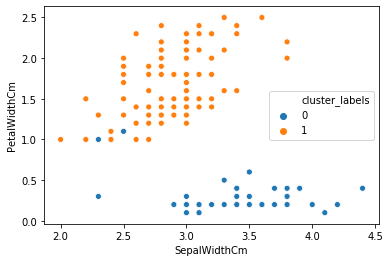

In [14]:
sns.scatterplot(x='SepalWidthCm', y='PetalWidthCm', hue='cluster_labels', data=iris)
plt.show()

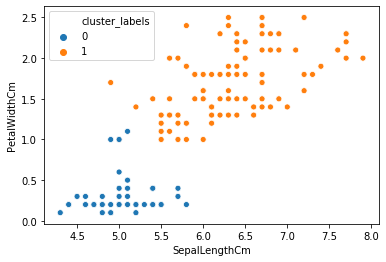

In [15]:
sns.scatterplot(x='SepalLengthCm', y='PetalWidthCm', hue='cluster_labels', data=iris)
plt.show()

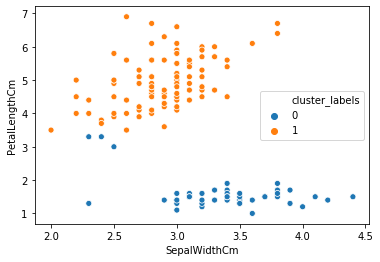

In [16]:
sns.scatterplot(x='SepalWidthCm', y='PetalLengthCm', hue='cluster_labels', data=iris)
plt.show()

In [17]:
iris[iris.cluster_labels==0].Species.unique()

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [18]:
iris[iris.cluster_labels==1].Species.unique()

array(['Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

---